# A. Predict the price of the Uber ride from a given pickup point to the agreed drop-off location. Perform following tasks:  
### 1. Pre-process the dataset.  
### 2. Identify outliers.  
### 3. Check the correlation.  
### 4. Implement linear regression and ridge, Lasso regression models.  
### 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.  
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
df = pd.read_csv("uber.csv")
# view dataset
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# 1 Preprocess The data

In [3]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
# Fill missing values in all numeric columns with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [5]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'])

In [6]:
# check datasets for removal of columns we removed 'first_column with no name', 'key' and 'pickup_datetime' column
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1


# 2 ]  Indentify Outliers 

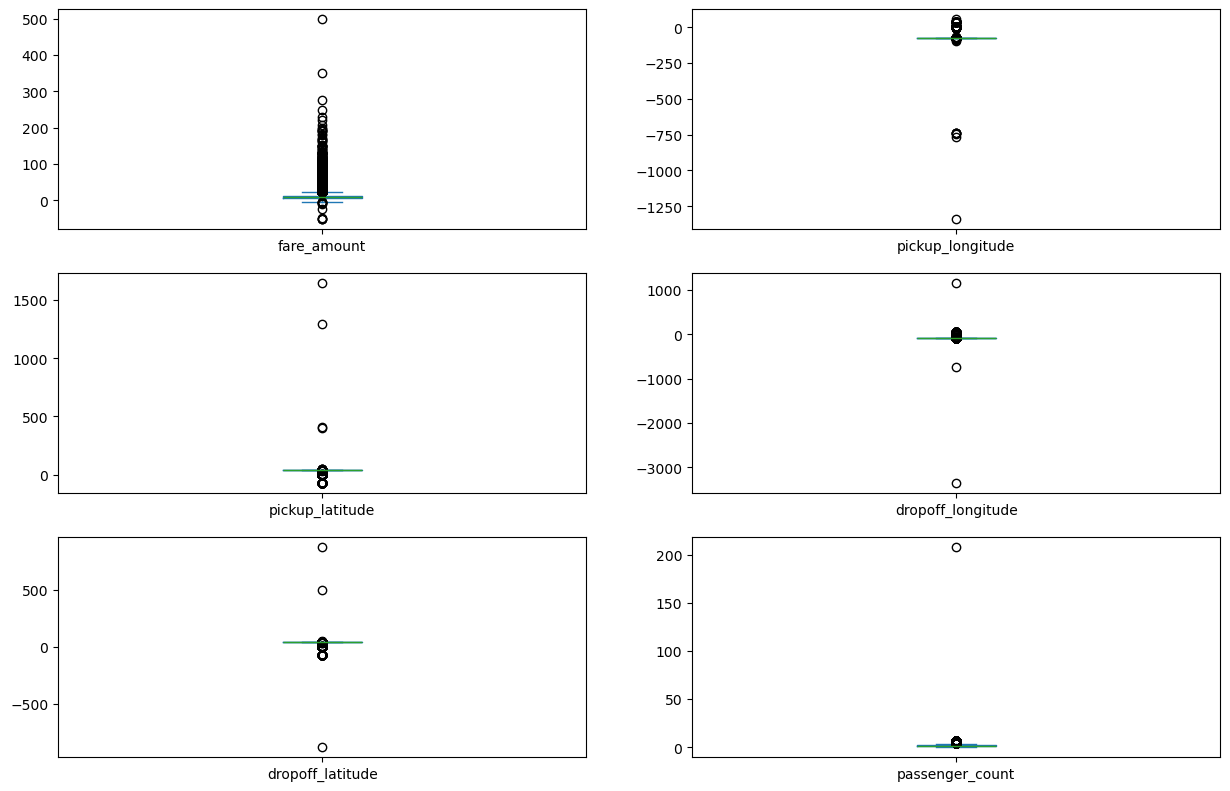

In [17]:
# Using boxplot to visualize outliers
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20))
plt.show()

In [8]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [9]:
df = treat_outliers_all(df , df.iloc[: , 0::])

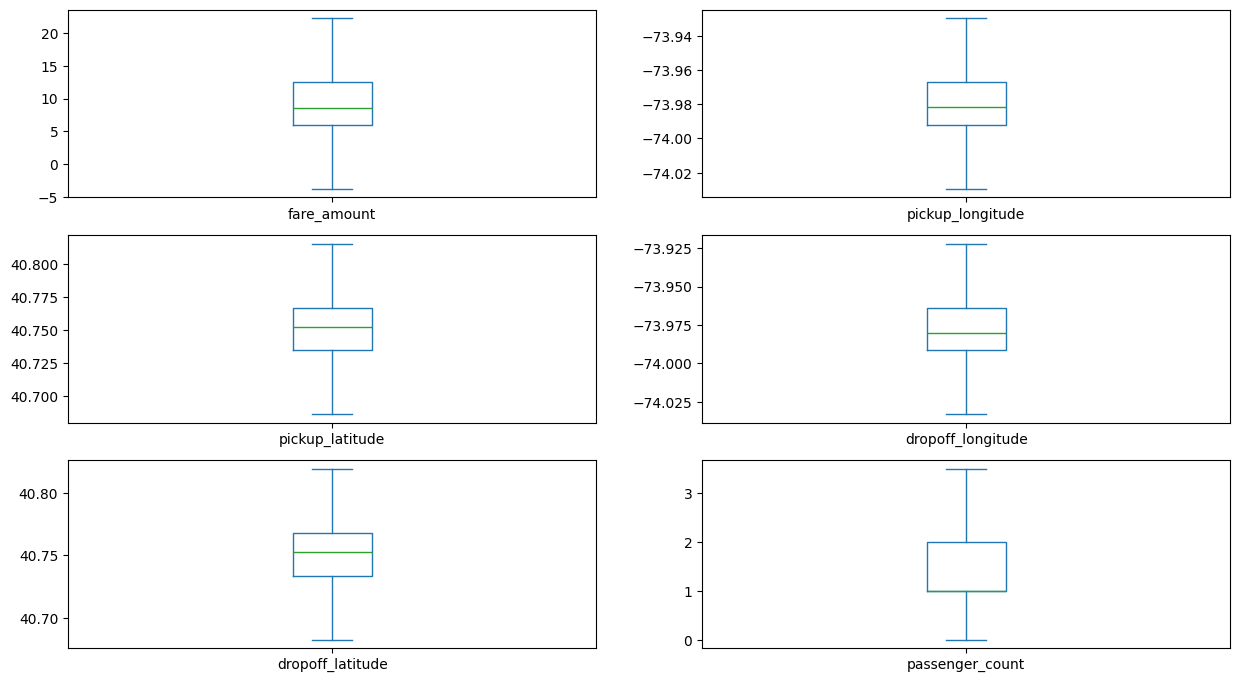

In [10]:
#Boxplot shows that dataset is free from outliers
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))
plt.show()

 # 3] Check the corelation

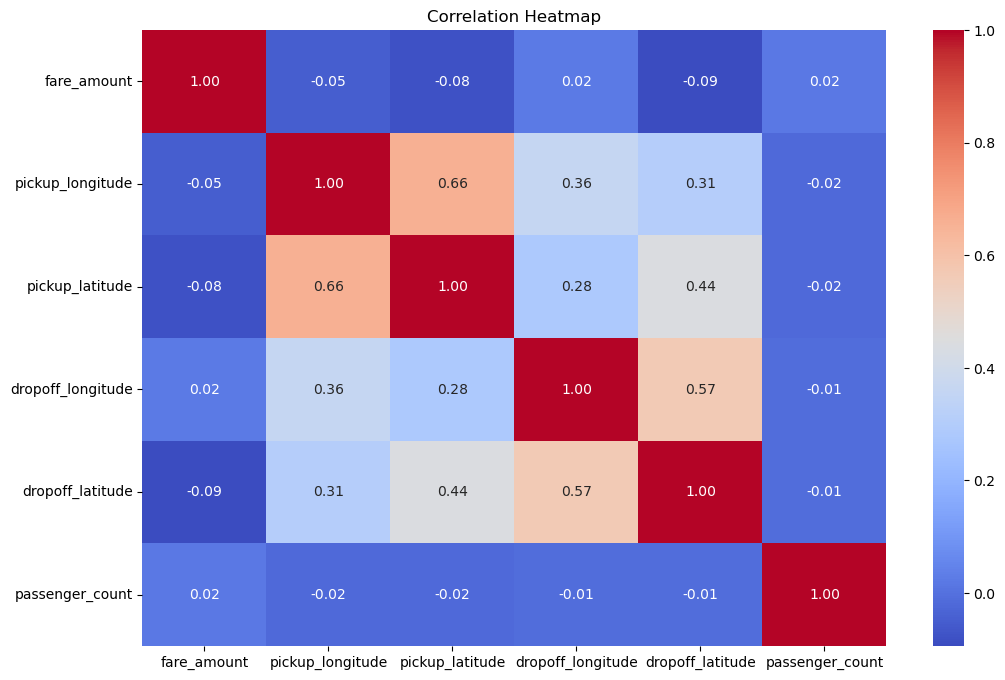

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [43]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['fare_amount'])  # create new dataset ignoring 'fare_amount' column
y = df['fare_amount']  # create a series of only 'fare_amount' column

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4] Implement linear regression and ridge, Lasso regression models.

In [57]:
# Implement Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

In [59]:
# Implement Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can experiment with different alpha values
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

In [63]:
# Implement Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can experiment with different alpha values
lasso_model.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# 5] Evaluate the models and compare their respective scores like R2, RMSE, etc.

In [73]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"{model_name} - R2 Score: {r2:.4f}, RMSE: {rmse:.2f}")

In [75]:
evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Linear Regression - R2 Score: 0.0174, RMSE: 3.75
Ridge Regression - R2 Score: 0.0174, RMSE: 3.75
Lasso Regression - R2 Score: 0.0147, RMSE: 3.76
